# Boston House Prices 
## About the Dataset
We will be working on a data set that comes from the real estate industry in Boston (US). This database contains 14 attributes. The target variable refers to the median value of owner-occupied homes in 1000 USD's.

* CRIM: per capita crime rate by town
* ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS: proportion of non-retail business acres per town
* CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX: nitric oxides concentration (parts per 10 million)
* RM: average number of rooms per dwelling
* AGE: proportion of owner-occupied units built prior to 1940
* DIS: weighted distances to five Boston employment centres
* RAD: index of accessibility to radial highways
* TAX: full-value property-tax rate per 10,000 USD
* PTRATIO: pupil-teacher ratio by town
* B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT: lower status of the population (%)
* MEDV: Median value of owner-occupied homes in 1000 USD's (Target)


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import Sequential    
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

## Loading Data

In [ ]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT', 'PRICE']

In [ ]:
data = pd.read_csv("../data/housing.csv", delim_whitespace=True, header=None)
data.columns = columns
data

In [ ]:
data.info()

In [ ]:
data.describe().transpose()

## Data preparation

In [ ]:
X = data.drop('PRICE', axis=1)
y = data['PRICE']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print('Train data:', X_train.shape)
print('Test data:', X_test.shape)

## Model definition

In [ ]:
n_features = X_train.shape[1]

def create_model(n_features):
    # define the model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_features,)))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))
    
    return model

model = create_model(n_features)

model.summary()

In [ ]:
# Compile the model:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
loss = tf.metrics.mean_squared_error
       
model.compile(optimizer=optimizer, loss=loss)

## Model training

In [ ]:
epochs = 50
callbacks = [EarlyStopping(monitor='val_loss', mode='min',
                           patience=10,
                           restore_best_weights=True)]

In [ ]:
model.fit(X_train, y_train,
          shuffle=True,
          callbacks=callbacks,
          epochs=epochs, validation_split=0.2)

Epoch 9/50
9/9 [==============================] - 0s 8ms/step - loss: 1412.1534 - val_loss: 1230.4958
Epoch 10/50
9/9 [==============================] - 0s 7ms/step - loss: 1283.5229 - val_loss: 1129.9392
Epoch 11/50
9/9 [==============================] - 0s 8ms/step - loss: 1185.1674 - val_loss: 1049.7803
Epoch 12/50
9/9 [==============================] - 0s 8ms/step - loss: 1110.4622 - val_loss: 980.2675
Epoch 13/50
9/9 [==============================] - 0s 9ms/step - loss: 1044.1653 - val_loss: 923.0673
Epoch 14/50
9/9 [==============================] - 0s 14ms/step - loss: 993.0692 - val_loss: 884.7856
Epoch 15/50
9/9 [==============================] - 0s 15ms/step - loss: 961.1876 - val_loss: 852.2606
Epoch 16/50
9/9 [==============================] - 0s 13ms/step - loss: 930.5573 - val_loss: 826.2830
Epoch 17/50
9/9 [==============================] - 0s 13ms/step - loss: 906.5956 - val_loss: 804.1595
Epoch 18/50
9/9 [==============================] - 0s 9ms/step - loss: 881.9415 

In [ ]:
def plot_model_hist(hist, feat='loss', figsize=(10, 6)):
    plt.figure(figsize=figsize)
    plt.plot(hist.index, hist[f'{feat}'], label='train')
    plt.plot(hist.index, hist[f'val_{feat}'], label='valid')
    plt.xlabel('epoch')
    plt.ylabel(feat)
    plt.legend()
    plt.tight_layout()
    plt.show()

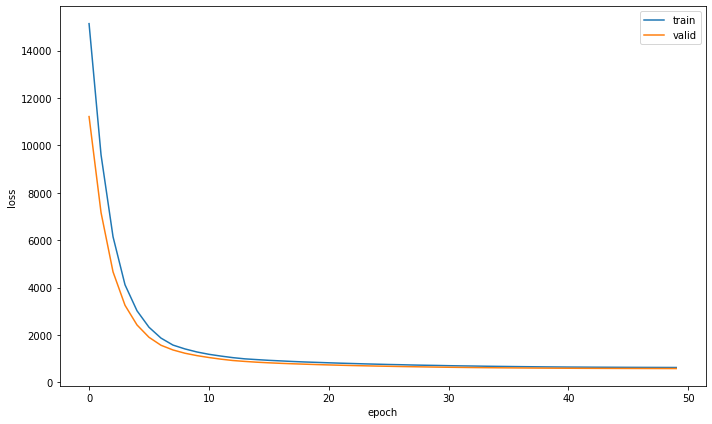

In [54]:
model_hist = pd.DataFrame(model.history.history)
plot_model_hist(model_hist)

In [55]:
print('MSE (train):', model.evaluate(X_train, y_train),
      '\nMSE (test):', model.evaluate(X_test, y_test))

5/5 [==============================] - 0s 5ms/step - loss: 539.0889
MSE (train): 618.6463623046875 
MSE (test): 539.0888671875


# **Explainable AI with Shapley values**


<br>
<br>

### Shapley values are a widely used approach from cooperative game theory that come with desirable properties. This tutorial is designed to help build a basic understanding of how to compute and interpet Shapley-based explanations on deep learning model using the shap Python package.

### SHAP can be installed from either PyPI or conda-forge:
### pip install shap
### or
### conda install -c conda-forge shap

In [56]:
import shap
shap.initjs()

### In this example we will explore KernelExplainer. The KernelExplainer builds a weighted linear regression by using your data, your predictions, and whatever function that predicts the predicted values. It computes the variable importance values based on the Shapley values from game theory, and the coefficients from a local linear regression.[https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a]

In [57]:
# KernelExplainer is a general approach that can work with any ML framework
# Its inputs are the predictions and training data

# Summarize the training set to accelerate analysis
df_train_normed_summary = shap.kmeans(X_train.values, 25)

# Instantiate an explainer with the model predictions and training data summary
explainer = shap.KernelExplainer(model.predict, df_train_normed_summary)

# Extract Shapley values from the explainer
shap_values = explainer.shap_values(X_train.values)

100%|██████████| 354/354 [15:05<00:00,  2.56s/it]


## **SHAP summary plot**

#### To get an overview of which features are most important for a model we can plot the SHAP values of every feature for every sample. 
#### The plot below sorts features by the sum of SHAP value magnitudes over all samples, and uses SHAP values to show the distribution of the impacts each feature has on the model output.
#### The color represents the feature value (red high, blue low). 

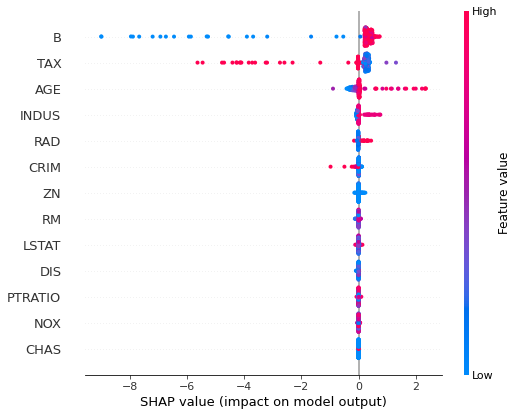

In [58]:
# Summarize the Shapley values in a plot
shap.summary_plot(shap_values[0], X_train)

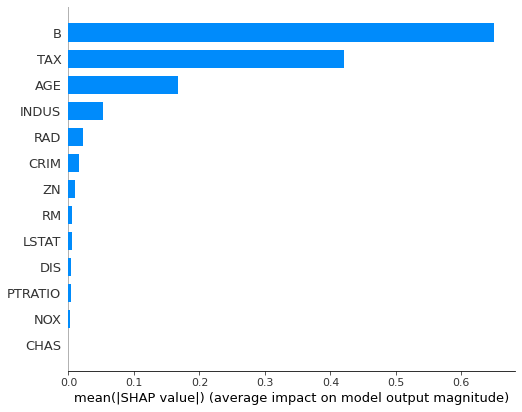

In [59]:
shap.summary_plot(shap_values[0], X_train,plot_type='bar')

In [61]:
# Plot the SHAP values for one instance
INSTANCE_NUM = 0
shap.force_plot(explainer.expected_value[0], shap_values[0][INSTANCE_NUM], X_train.iloc[INSTANCE_NUM,:])

#### 25.89 is the predicted value. The base value is the average value of the target variable across all the records. Each stripe shows the impact of its features in pushing the base value. Red stripes show that their features push the value towards higher values. Blue stripes show that their features push the value towards lower values. The wider a stripe, the higher (in absolute value) the contribution. The sum of these contributions pushes the value of the target variable from the vase value to the final, predicted value.

#### As we can see, for this particular record INDUS, B, LSTAT,  CRIM and LSTAT values have a positive contribution to the predicted value. INDUS is still the most important variable of this record, because its contribution is the widest one (it has the largest stripe). The  variables that show a negative contribution are TAX, ZN and AGE but they're not strong enough to move the predicted value lower than the base value. So, since the total positive contribution (red stripes) is larger than the negative contribution (blue stripe), the final value is greater than the base value. 

## **SHAP force plot**

In [62]:
# Plot the SHAP values for multiple instances
NUM_ROWS = 10
shap.force_plot(explainer.expected_value[0], shap_values[0][0:NUM_ROWS], X_train.iloc[0:NUM_ROWS])

## **SHAP dependence plot**


 ### A dependence plot is a scatter plot that shows the effect a single feature has on the predictions made by the model.If an interaction effect is present between this other feature and the feature we are plotting it will show up as a distinct vertical pattern of coloring.
### Each dot is a single prediction (row) from the dataset.
### The x-axis is the value of the feature (from the X matrix).
### The y-axis is the SHAP value for that feature, which represents how much knowing that feature's value changes the output of the model for that sample's prediction.

  

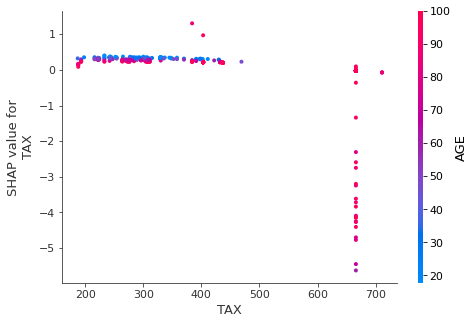

In [63]:
# Create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot('TAX', shap_values[0], X_train, interaction_index='AGE')

## **SHAP decision plot**

###  As like the summary plot, it gives an overall picture of contribution to prediction. From bottom to top of the decision plot, shap values are cumulatively added to the base value of the model in determining the output values.

The expected value is  [-0.15686547]


100%|██████████| 354/354 [12:27<00:00,  2.11s/it]


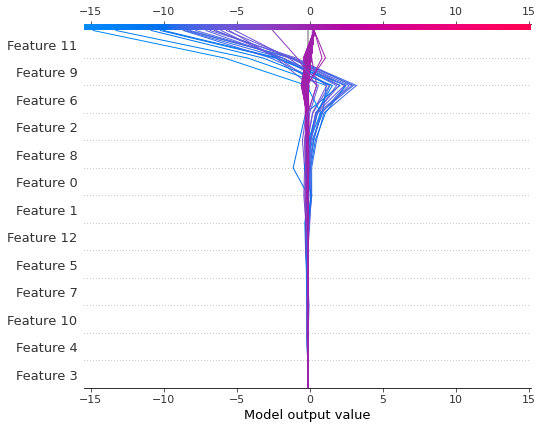

In [66]:
# decision plot for one instance
expected_value = explainer.expected_value
print("The expected value is ", expected_value)
shap_values = explainer.shap_values(X_train.values)[0]
shap.decision_plot(expected_value, shap_values, X_train.values)

In [67]:
#Get feature importance from SHAP 
shap_sum = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame([X_train.columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df

,column_name,shap_importance
11,B,0.648483
9,TAX,0.421473
6,AGE,0.166481
2,INDUS,0.053586
8,RAD,0.022151
0,CRIM,0.016205
1,ZN,0.0107
12,LSTAT,0.005473
5,RM,0.005016
7,DIS,0.004549


# Citation

#### Github repo: https://github.com/slundberg/shap
#### A Unified Approach to Interpreting Model Predictions: https://arxiv.org/pdf/1705.07874v2.pdf
#### https://towardsdatascience.com/a-novel-approach-to-feature-importance-shapley-additive-explanations-d18af30fc21b#5280
#### https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html